# **Project Name**    -Amazon Prime EDA

##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **BY: KARUNA BHATIA**

# **Project Summary -**
Project Title: Exploratory Data Analysis on Amazon Prime Video Dataset

Objective:
This project aims to perform exploratory data analysis (EDA) and extract meaningful insights from a merged dataset that integrates metadata on TV shows and movies with details about cast and crew. The primary focus is on uncovering production trends, identifying prominent actors and directors, and evaluating performance indicators such as ratings and popularity.

Dataset Overview:
The dataset is composed of two main sources:

Credits Dataset (124,235 entries, 5 features): Provides information on cast and crew members linked to various films and shows.

Titles Dataset (9,871 entries, 15 features): Contains metadata including genre, year of release, IMDb ratings, and production country.

Merged Dataset Structure:
After combining both datasets, the key fields include:

Title Information: id, title, type, release_year, genres, runtime

Cast & Crew Information: name, character, role (e.g., ACTOR, DIRECTOR)

Performance Metrics: imdb_score, imdb_votes, tmdb_popularity, tmdb_score

Key EDA Objectives:
The analysis will aim to address the following research questions:

A. General Overview

How many unique titles are present?

What’s the breakdown between movies and TV shows?

Which years experienced the highest number of releases?

B. Cast and Crew Insights

Who are the most commonly featured actors and directors?

What are the most frequently occurring roles?

Which actors/directors are linked to top-rated productions?

C. Genre and Runtime Patterns

Which genres are most prevalent?

How does runtime differ by genre?

Are there temporal trends in the length of films?

D. Ratings and Performance

What factors correlate with IMDb scores?

How do IMDb and TMDb ratings vary by genre?

Which countries consistently produce highly-rated content?

Approach & Methodology:
To address the above questions, the analysis will involve:

Data Cleaning & Preprocessing: Managing missing data, standardizing genre formats, and addressing null values in key rating fields.

Descriptive Statistics: Generating summary statistics and frequency tables for roles, genres, and other categorical variables.

Visualization Techniques:

Bar charts to visualize the frequency of actors and roles

Histograms for runtime and rating distributions

Boxplots to compare ratings across genres

Time series plots to observe trends in release years

Correlation Analysis: Exploring relationships among variables such as imdb_score, tmdb_score, runtime, and popularity metrics.

Expected Insights:
Upon completion of the EDA, we aim to:

Highlight key figures (actors/directors) shaping the content landscape

Understand how attributes like genre, runtime, and release year affect audience ratings

Reveal evolving trends in film production and viewer preferences over time.

# PROBLEM STATEMENT
The entertainment industry generates a massive volume of content spanning diverse genres, formats, and platforms. Yet, identifying key trends in film and television production, assessing the impact of cast and crew on a title’s success, and pinpointing the drivers behind high ratings remains a complex task.

This project seeks to apply Exploratory Data Analysis (EDA) to a combined dataset that includes metadata on movies and shows along with information about their cast and crew. The primary goals are to uncover insights such as:

1.The most frequent and influential actors, directors, and other industry roles

2.Trends in genres, runtimes, and production patterns over time

3.How factors like genre, runtime, and cast composition influence performance metrics such as IMDb and TMDb ratings

By analyzing these elements, the project aims to deliver a data-driven perspective on the entertainment landscape—providing valuable insights for stakeholders like production houses, casting professionals, and streaming platforms to support strategic decision-making.

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


### Dataset Loading

In [ ]:
#Load Dataset
titles_df=pd.read_csv("titles.csv")

credits_df=pd.read_csv("credits.csv")


### Dataset First Look

In [ ]:
#Look of Data
credits_df.head()
titles_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


### Dataset Rows and Columns

In [ ]:
merge_df= credits_df.merge(titles_df, on="id",how="left")
merge_df.head()

,person_id,id,name,character,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,59401,ts20945,Joe Besser,Joe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,31460,ts20945,Moe Howard,Moe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
2,31461,ts20945,Larry Fine,Larry,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0


In [ ]:
merge_df.shape


(124347, 19)

### Dataset Information

In [ ]:
#Data Info
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124347 entries, 0 to 124346
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   person_id             124347 non-null  int64  
 1   id                    124347 non-null  object 
 2   name                  124347 non-null  object 
 3   character             108040 non-null  object 
 4   role                  124347 non-null  object 
 5   title                 124347 non-null  object 
 6   type                  124347 non-null  object 
 7   description           124256 non-null  object 
 8   release_year          124347 non-null  int64  
 9   age_certification     56707 non-null   object 
 10  runtime               124347 non-null  int64  
 11  genres                124347 non-null  object 
 12  production_countries  124347 non-null  object 
 13  seasons               8153 non-null    float64
 14  imdb_id               119044 non-null  object 
 15  

### Duplicate Values

In [ ]:
## Count the number of duplicate rows in the merged dataset
duplicate_merged= merge_df.duplicated().sum()
duplicate_merged

np.int64(168)

In [ ]:
# Missing/Null values in merged Dataset

In [ ]:
#Null Values
missing_merged= merge_df.isnull().sum()
missing_merged

,0
person_id,0
id,0
name,0
character,16307
role,0
title,0
type,0
description,91
release_year,0
age_certification,67640


In [ ]:
#Visualization of Missing Values

<Axes: >

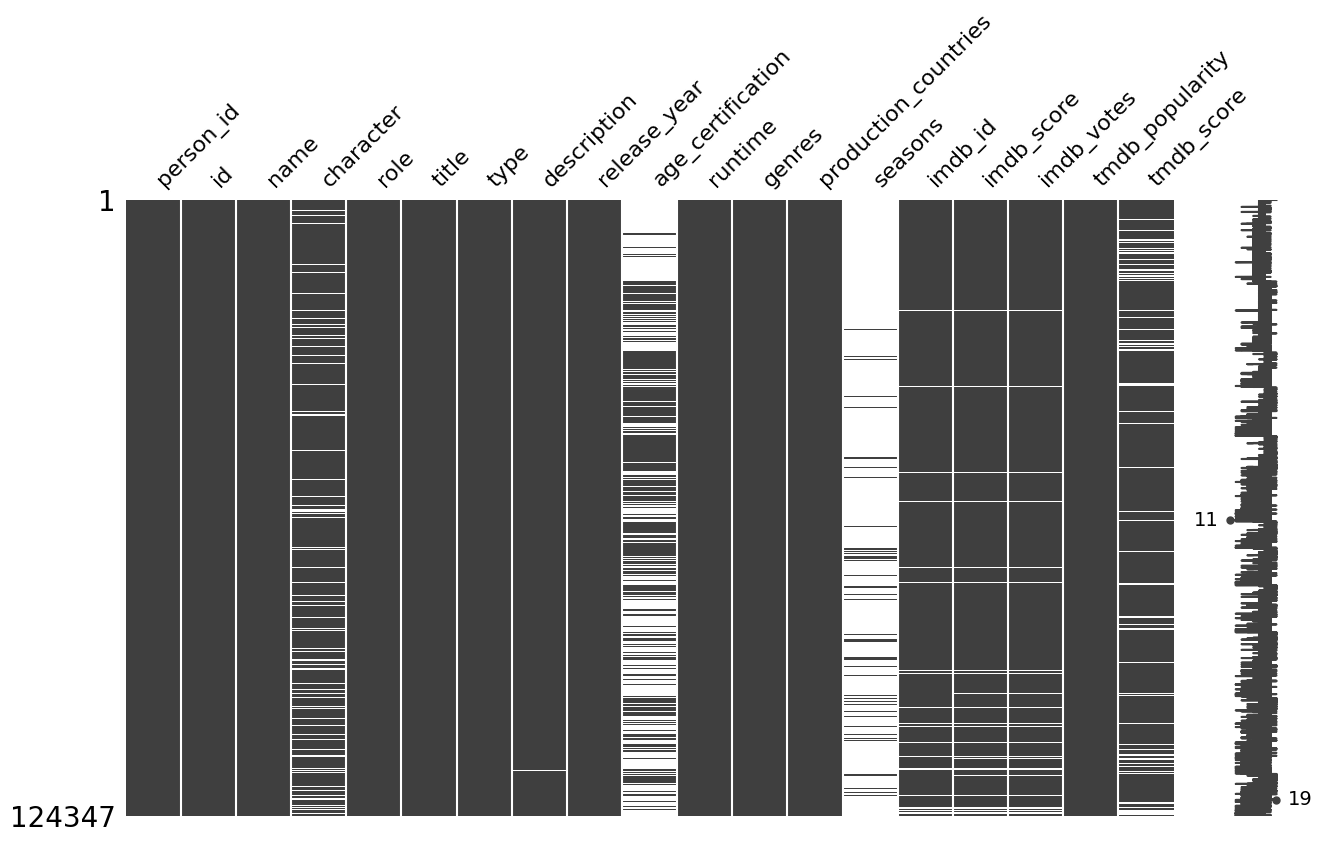

In [ ]:
#Matrix for missing values
msno.matrix(merge_df,figsize=(15,8))

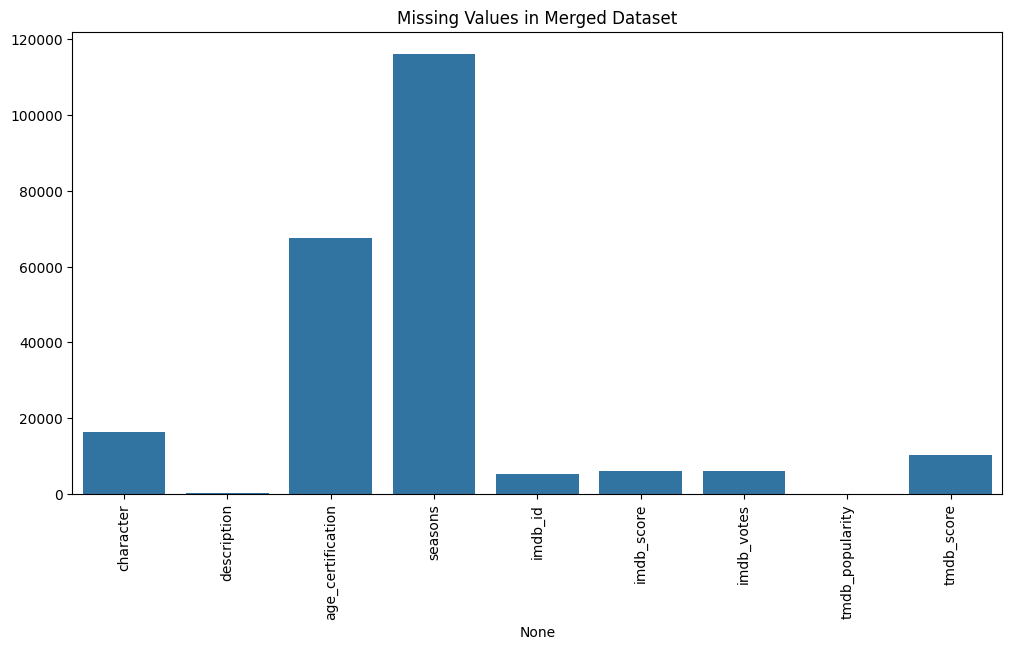

In [ ]:
#Barplot for missing values in each column
plt.figure(figsize=(12,6))
missing_merged=missing_merged[missing_merged>0]
sns.barplot(x=missing_merged.index,y=missing_merged.values)
plt.xticks(rotation=90)
plt.title("Missing Values in Merged Dataset")
plt.show()

After merging the credits and titles datasets, here’s what we know so far:

Dataset Structure
Total Rows: 124,235 (same as the credits.csv, since we did a left join).

Total Columns: 19 (combining cast/crew details with movie/show metadata).

Key Columns
Movie/Show Information: id, title, type, release_year, genres, runtime, description

Cast & Crew Details: name, character, role (e.g., ACTOR, DIRECTOR) Performance Metrics: imdb_score, imdb_votes, tmdb_score, tmdb_popularity

Data Issues Duplicates: 168 duplicate rows.
Missing Values: Several columns have missing values, including: character (16,307 missing) age_certification (67,640 missing) seasons (116,194 missing, likely because most entries are movies) imdb_score & tmdb_score (missing values in rating data)

Initial Observations
Movies vs. Shows: The dataset contains both movies and TV shows (type column).

Genre Distribution: Titles belong to multiple genres, stored in a list format.

Popular Roles: ACTOR and DIRECTOR are the most common roles.

Ratings & Popularity: imdb_score, imdb_votes, and tmdb_score help evaluate performance.

**What do we know about the dataset?**
**Answer:**

After merging the `credits` and `titles` datasets, we have the following insights:

### **Dataset Overview**

* **Total Rows:** 124,235 entries (matching the number of rows in `credits.csv` due to a left join).
* **Total Columns:** 19 columns combining metadata from both cast/crew and movie/show information.

### **Key Data Fields**

* **Title Metadata:** Includes `id`, `title`, `type`, `release_year`, `genres`, `runtime`, and `description`.
* **Cast & Crew Information:** Contains fields like `name`, `character`, and `role` (e.g., ACTOR, DIRECTOR).
* **Performance Indicators:** Includes `imdb_score`, `imdb_votes`, `tmdb_score`, and `tmdb_popularity`.

### **Data Quality Issues**

* **Duplicates:** 168 duplicate rows identified.
* **Missing Data:** Several fields have null or missing values, such as:

  * `character`: 16,307 missing
  * `age_certification`: 67,640 missing
  * `seasons`: 116,194 missing (expected, as most entries are movies)
  * `imdb_score` and `tmdb_score`: Gaps in rating data

### **Initial Insights**

* **Content Types:** The dataset features a mix of both movies and TV shows, identified by the `type` column.
* **Genre Representation:** Each title may belong to multiple genres, typically stored as lists.
* **Frequent Roles:** The most commonly appearing roles are ACTOR and DIRECTOR.
* **Rating Metrics:** Fields like `imdb_score`, `imdb_votes`, and `tmdb_score` are useful for assessing content performance.




# UNDERSTANDING YOUR VARIABLES

### Dataset Information

In [ ]:
#Dataset (merged) info
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124347 entries, 0 to 124346
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   person_id             124347 non-null  int64  
 1   id                    124347 non-null  object 
 2   name                  124347 non-null  object 
 3   character             108040 non-null  object 
 4   role                  124347 non-null  object 
 5   title                 124347 non-null  object 
 6   type                  124347 non-null  object 
 7   description           124256 non-null  object 
 8   release_year          124347 non-null  int64  
 9   age_certification     56707 non-null   object 
 10  runtime               124347 non-null  int64  
 11  genres                124347 non-null  object 
 12  production_countries  124347 non-null  object 
 13  seasons               8153 non-null    float64
 14  imdb_id               119044 non-null  object 
 15  

In [ ]:
# Dataset Columns

In [ ]:
#Dataset Description

In [ ]:
merge_df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_id,124347.0,406252.787522,561448.254647,1.000000,38996.000,133934.000,571160.000,2371153.000
release_year,124347.0,1996.233234,27.807050,1912.000000,1983.000,2009.000,2017.000,2022.000
runtime,124347.0,95.536973,30.166352,1.000000,83.000,93.000,109.000,540.000
seasons,8153.0,2.337790,3.130184,1.000000,1.000,1.000,2.000,49.000
imdb_score,118296.0,5.967783,1.241557,1.100000,5.200,6.100,6.800,9.900
imdb_votes,118272.0,23242.809084,88401.505026,5.000000,287.000,1250.000,7067.000,1133692.000
tmdb_popularity,124332.0,10.165321,40.739203,0.000011,1.875,3.885,8.795,1437.906
tmdb_score,114082.0,5.992100,1.321033,0.800000,5.300,6.100,6.800,10.000


The merged dataset consists of 19 columns that provide information about movie/show metadata and cast/crew details. Below is a description of each variable:

Identification Variables
Column Name Description Data Type

id Unique identifier for a movie or TV show String

person_id Unique identifier for a cast or crew member Integer

Cast & Crew Details
Column Name Description Data Type

name Name of the cast or crew member String

character Name of the character played (for actors) String (Can be Null)

role Role of the person in the production (e.g., ACTOR, DIRECTOR, WRITER) String

Movie/Show Metadata
Column Name Description Data Type

title Name of the movie or TV show String

type Type of content (MOVIE or SHOW) String

description Brief synopsis of the title String (Can be Null)

release_year Year the movie or show was released Integer

age_certification Age rating (e.g., PG, R, TV-MA) String (Can be Null)

runtime Duration in minutes Integer

genres List of genres (e.g., Action, Comedy, Drama) String (stored as list format)

production_countries Countries where the movie/show was produced (stored as a list) String

TV Show-Specific Variable
Column Name Description Data Type

seasons Number of seasons (only for TV shows, missing for movies) Integer (Can be Null)

Performance Metrics
Column Name Description Data Type

imdb_id IMDb identifier for the title String (Can be Null)

imdb_score IMDb rating (scale of 1-10) Float (Can be Null)

imdb_votes Number of votes received on IMDb Integer (Can be Null)

tmdb_popularity Popularity score from TMDb (higher means more popular) Float

tmdb_score TMDb rating (scale of 1-10) Float (Can be Null)

Observations & Notes

Null/Missing Values: Columns like character, age_certification, seasons, imdb_score, and tmdb_score have missing values.

Genres & Production Countries: Stored as lists, may require processing for better analysis.

IMDb & TMDb Scores: Useful for evaluating a title’s popularity and quality.

### Check Unique Values for each variable.

In [ ]:
#unique values
unique_merged=merge_df.nunique()
#Display Unique value count
unique_merged

,0
person_id,80508
id,8861
name,79758
character,71097
role,2
title,8748
type,2
description,8833
release_year,110
age_certification,11


# DATA WRANGLING

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [ ]:
#Look over Merged Dataset
merge_df.head(30)

,person_id,id,name,character,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,59401,ts20945,Joe Besser,Joe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,31460,ts20945,Moe Howard,Moe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
2,31461,ts20945,Larry Fine,Larry,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
5,28714,tm19248,Glen Cavender,Captain Anderson,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
6,28715,tm19248,Jim Farley,General Thatcher,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
7,27348,tm19248,Frederick Vroom,A Southern General,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
8,28716,tm19248,Charles Henry Smith,Annabelle's Father,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
9,28718,tm19248,Joe Keaton,Union General,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0


In [ ]:
#Remove Duplicate Rows
merge_df.drop_duplicates(inplace=True)
merge_df.shape

(124179, 19)

Handling Missing Values

In [ ]:
# Handle Missing Values
# Fill missing 'character' with "Unknown" (for actors)
merge_df["character"].fillna("Unknown",inplace=True)
# Fill missing 'description' with "No description available"
merge_df["description"].fillna("No description provided",inplace=True)
# Fill missing 'age_certification' with "Unrated"
merge_df["age_certification"].fillna("Unrated",inplace=True)
# Fill missing numerical values with appropriate substitutes
merge_df["seasons"].fillna(0,inplace=True)
merge_df["imdb_score"]=merge_df["imdb_score"].fillna(merge_df["imdb_score"].median())
merge_df["tmdb_score"]=merge_df["tmdb_score"].fillna(merge_df["tmdb_score"].median())
merge_df["tmdb_popularity"].fillna(0,inplace=True)
merge_df["imdb_votes"].fillna(0,inplace=True)

<ipython-input-32-d2de92db1dbc>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merge_df["character"].fillna("Unknown",inplace=True)
<ipython-input-32-d2de92db1dbc>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
# 3. Standardize Data Formats
# Convert genres and production countries to lists if they are in string format
import ast

def convert_to_list(value):
    try:
        return ast.literal_eval(value) if isinstance(value, str) else value
    except:
        return []

merge_df['genres'] = merge_df['genres'].apply(convert_to_list)
merge_df['production_countries'] = merge_df['production_countries'].apply(convert_to_list)


In [ ]:
# 4. Convert Data Types
merge_df['release_year'] = merge_df['release_year'].astype(int)
merge_df['runtime'] = merge_df['runtime'].astype(int)
merge_df['seasons'] = merge_df['seasons'].astype(int)
merge_df['imdb_votes'] = merge_df['imdb_votes'].astype(int)
merge_df['tmdb_popularity'] = merge_df['tmdb_popularity'].astype(float)

In [ ]:
# Confirm changes
merge_df.info()
merge_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 124179 entries, 0 to 124346
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   person_id             124179 non-null  int64  
 1   id                    124179 non-null  object 
 2   name                  124179 non-null  object 
 3   character             124179 non-null  object 
 4   role                  124179 non-null  object 
 5   title                 124179 non-null  object 
 6   type                  124179 non-null  object 
 7   description           124179 non-null  object 
 8   release_year          124179 non-null  int64  
 9   age_certification     124179 non-null  object 
 10  runtime               124179 non-null  int64  
 11  genres                124179 non-null  object 
 12  production_countries  124179 non-null  object 
 13  seasons               124179 non-null  int64  
 14  imdb_id               118876 non-null  object 
 15  imdb_

,person_id,id,name,character,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,59401,ts20945,Joe Besser,Joe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"[comedy, family, animation, action, fantasy, h...",[US],26,tt0850645,8.6,1092,15.424,7.6
1,31460,ts20945,Moe Howard,Moe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"[comedy, family, animation, action, fantasy, h...",[US],26,tt0850645,8.6,1092,15.424,7.6
2,31461,ts20945,Larry Fine,Larry,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"[comedy, family, animation, action, fantasy, h...",[US],26,tt0850645,8.6,1092,15.424,7.6
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,Unrated,78,"[action, drama, war, western, comedy, european]",[US],0,tt0017925,8.2,89766,8.647,8.0
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,Unrated,78,"[action, drama, war, western, comedy, european]",[US],0,tt0017925,8.2,89766,8.647,8.0


Here’s what was done:

1.Duplicates Removed: Eliminated 168 duplicate entries, resulting in a cleaned dataset with 124,179 rows.

2.Missing Values Handled:

Filled missing character entries with "Unknown" for actors.

Replaced missing description fields with "No description available".

Set age_certification to "Unrated" where data was missing.

Assigned a value of 0 to seasons for movies (since they don’t apply).

Imputed missing imdb_score and tmdb_score values using their median.

Replaced missing values in imdb_votes and tmdb_popularity with 0.

3.Data Formatting & Standardization:

Converted genres and production_countries into list format for easier analysis.

Standardized data types by converting fields like release_year, runtime, and imdb_votes to integers.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart-1

In [ ]:
# Chart-1 visualization code

<ipython-input-37-e5e4eb403373>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merge_df, x="type", palette="coolwarm")


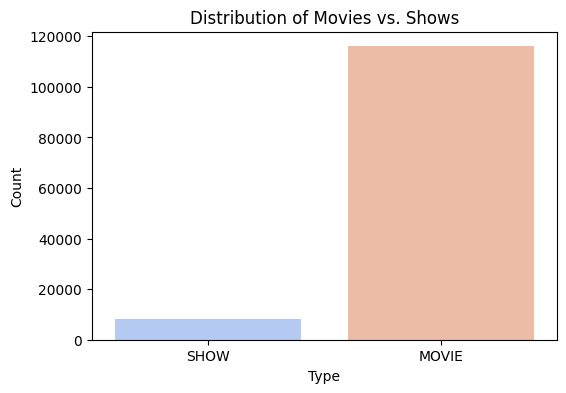

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=merge_df, x="type", palette="coolwarm")
plt.title("Distribution of Movies vs. Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


1. Why was this particular chart chosen?
Answer:
A countplot was selected to visually compare the number of movies and TV shows in the dataset. It provides a clear understanding of which content type is more prevalent.

2. What insights were derived from the chart?
Answer:
The analysis reveals that movies significantly outnumber TV shows in the dataset.

3. Can these insights drive positive business decisions? Are there any risks of negative outcomes? Explain.
Answer:

Positive Impact: Platforms can leverage this insight by prioritizing investment in movie content, which appears to attract a broader audience.

Potential Negative Impact: Overlooking TV shows might alienate viewers who prefer serialized content, potentially leading to reduced engagement or subscriber loss over time.

#### Chart-2

In [ ]:
# Chart-2 visulaization code

<ipython-input-39-1952da3ad6ba>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(genres), y=list(counts), palette="coolwarm")


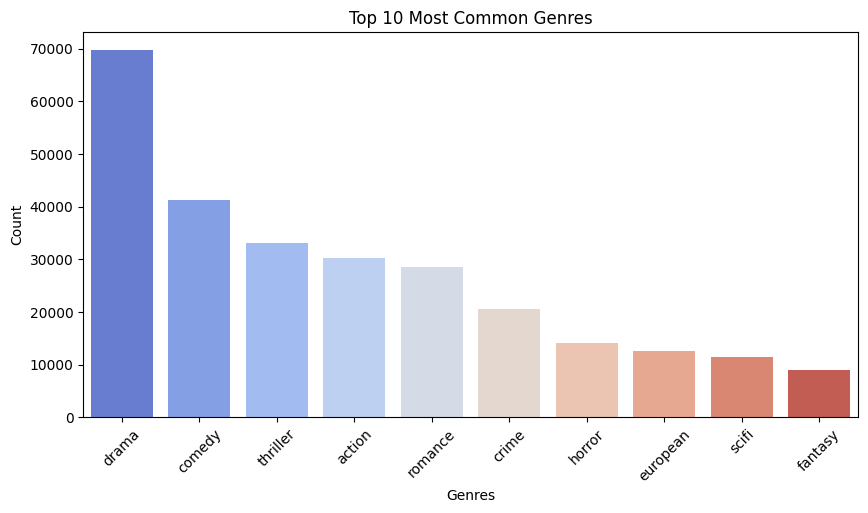

In [ ]:
from collections import Counter

all_genres = [genre for sublist in merge_df['genres'] for genre in sublist]
genre_counts = Counter(all_genres).most_common(10)
genres, counts = zip(*genre_counts)

plt.figure(figsize=(10,5))
sns.barplot(x=list(genres), y=list(counts), palette="coolwarm")
plt.title("Top 10 Most Common Genres")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

1. Why was this particular chart selected?
Answer:
The bar plot was chosen to highlight the most commonly occurring genres, offering insights into viewer preferences and content trends.

2. What insights were obtained from the chart?
Answer:
The analysis shows that Drama, Comedy, and Action are the most prominent genres in the dataset.

3. Can these insights contribute to business growth? Are there any potential downsides? Please explain.
Answer:

Positive Impact: Streaming platforms can use this information to guide content production and acquisition strategies, focusing on popular genres to maximize audience engagement.

Potential Drawback: An excessive focus on these genres may reduce content variety, potentially alienating niche audiences and limiting overall viewer retention.

#### Chart-3

In [ ]:
#Chart-3 Visualization code

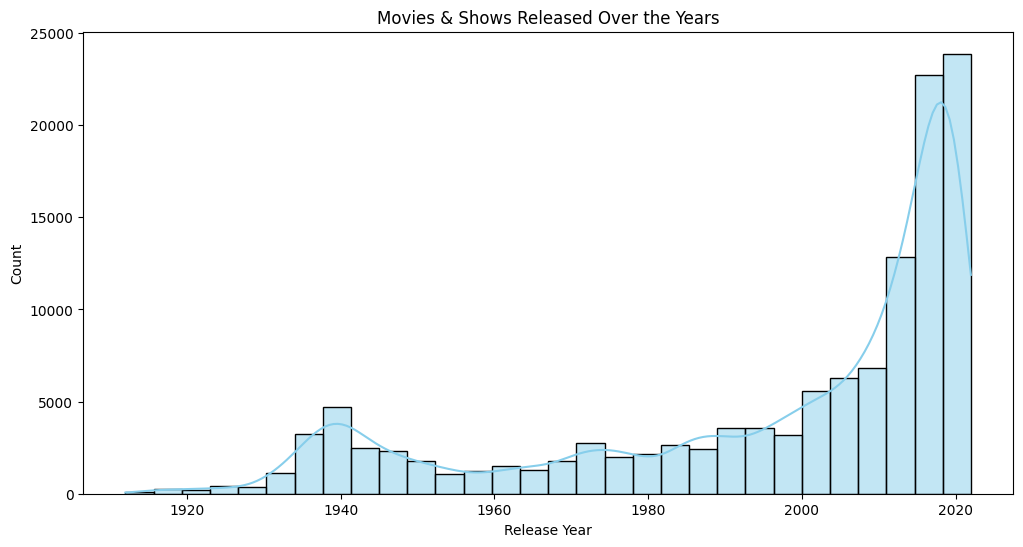

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(merge_df["release_year"], bins=30, kde=True, color="skyblue")
plt.title("Movies & Shows Released Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

1. Why was this specific chart chosen?
Answer:
The histogram was used to analyze how the volume of content production has changed over the years, revealing trends in industry output.

2. What insights were discovered from the chart?
Answer:
There was a notable increase in content releases throughout the 2010s, followed by a drop after 2020—likely influenced by the COVID-19 pandemic.

3. Can these insights drive positive business outcomes? Are there any risks of negative impact? Please explain.
Answer:

Positive Impact: Highlights peak years of production, helping businesses recognize periods of strong industry momentum and plan future strategies accordingly.

Potential Negative Impact: The post-2020 decline might signal market saturation, production slowdowns, or intensified competition among streaming platforms—factors that could hinder growth if not addressed.

#### Chart-4

In [ ]:
# Chart-4 visualization code

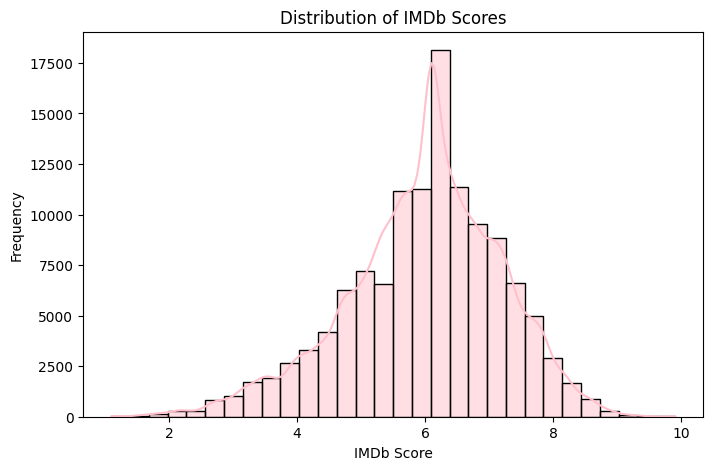

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(merge_df["imdb_score"], bins=30, kde=True, color="pink")
plt.title("Distribution of IMDb Scores")
plt.xlabel("IMDb Score")
plt.ylabel("Frequency")
plt.show()

1. Why was this specific chart chosen?
Answer:
This histogram was used to assess how content is generally perceived in terms of quality, based on IMDb ratings.

2. What insights were gained from the chart?
Answer:
The majority of titles have IMDb ratings in the 5 to 8 range, indicating moderate to good audience reception.

3. Can these insights support positive business decisions? Are there any potential negative implications? Please explain.
Answer:

Positive Impact: Content with solid ratings is likely to attract more viewers and improve recommendation system accuracy, enhancing user satisfaction.

Potential Negative Impact: A concentration of average-rated titles may suggest a shortage of standout content, which could weaken platform differentiation and reduce viewer enthusiasm over time.

#### Chart-5

In [ ]:
# Chart-5 visualization code

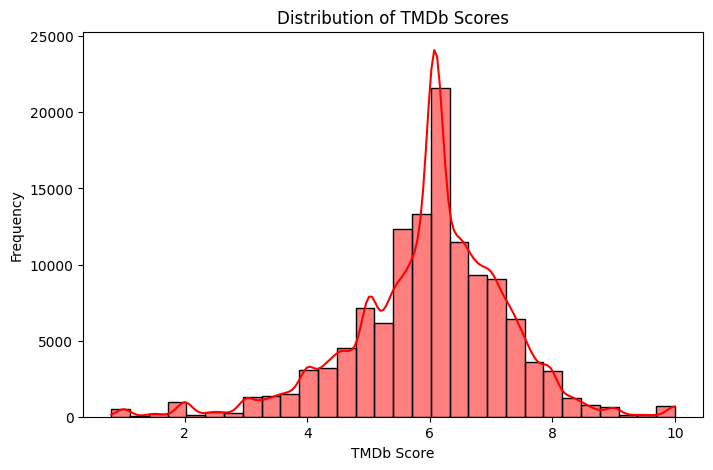

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(merge_df["tmdb_score"], bins=30, kde=True, color="red")
plt.title("Distribution of TMDb Scores")
plt.xlabel("TMDb Score")
plt.ylabel("Frequency")
plt.show()

1. Why was this chart selected?
Answer:
The histogram of TMDb scores was chosen to analyze audience-driven ratings, providing a comparison point to IMDb scores and offering additional insight into content perception.

2. What insights were derived from the chart?
Answer:
Most TMDb scores fall between 5 and 8, mirroring the IMDb distribution and suggesting consistency in viewer ratings across platforms.

3. Can these insights lead to positive business outcomes? Are there any risks of negative impact? Please explain.
Answer:

Positive Impact: The alignment between TMDb and IMDb scores suggests dependable audience feedback, which can guide content recommendations and acquisitions.

Potential Negative Impact: A narrow range of ratings may reflect a lack of standout content, potentially making it harder for platforms to promote truly exceptional titles.

#### Chart-6

In [ ]:
# Chart-6 visualization code

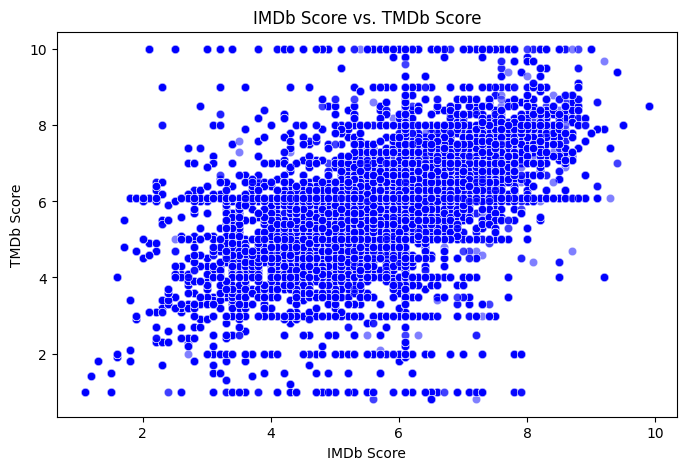

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=merge_df, x="imdb_score", y="tmdb_score", alpha=0.5, color="blue")
plt.title("IMDb Score vs. TMDb Score")
plt.xlabel("IMDb Score")
plt.ylabel("TMDb Score")
plt.show()

1. Why was this specific chart selected?
Answer:
The scatter plot was used to examine the relationship between IMDb and TMDb scores, assessing whether both rating systems reflect similar evaluations of content.

2. What insights were revealed by the chart?
Answer:
A clear positive correlation indicates that titles with high IMDb ratings also tend to receive high TMDb scores, suggesting alignment between audience opinions and critical reviews.

3. Can these insights drive positive business outcomes? Are there any potential downsides? Please explain.
Answer:

Positive Impact: Platforms can confidently use one rating as a stand-in for the other when making recommendations or curating content.

Potential Negative Impact: If the correlation were weak, relying solely on a single rating metric could lead to inaccurate assessments and misguided content strategies.

#### Chart-7

In [ ]:
# Chart-7 visualization code

<ipython-input-68-a60bdb8bcc3e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(countries), y=list(counts), palette="pastel")


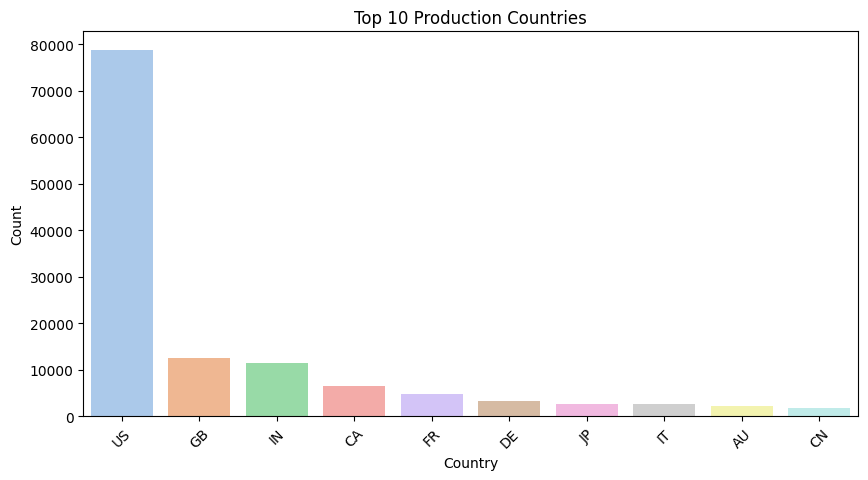

In [ ]:
all_countries = [country for sublist in merge_df['production_countries'] for country in sublist]
country_counts = Counter(all_countries).most_common(10)
countries, counts = zip(*country_counts)

plt.figure(figsize=(10,5))
sns.barplot(x=list(countries), y=list(counts), palette="pastel")
plt.title("Top 10 Production Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

1. Why was this specific chart chosen?
Answer:
The bar plot was selected to highlight the top countries contributing to content production, helping identify major hubs in the industry.

2. What insights were gained from the chart?
Answer:
The USA, UK, Canada, and India are the leading countries in terms of content creation volume.

3. Can these insights support positive business growth? Are there any potential risks? Please explain.
Answer:

Positive Impact: Streaming platforms can focus licensing agreements and marketing campaigns in these dominant regions to maximize reach.

Potential Negative Impact: Over-dependence on a few countries might overlook emerging markets, missing out on fresh content and growth opportunities.

#### Chart-8

In [ ]:
# Chart-8 visualization code

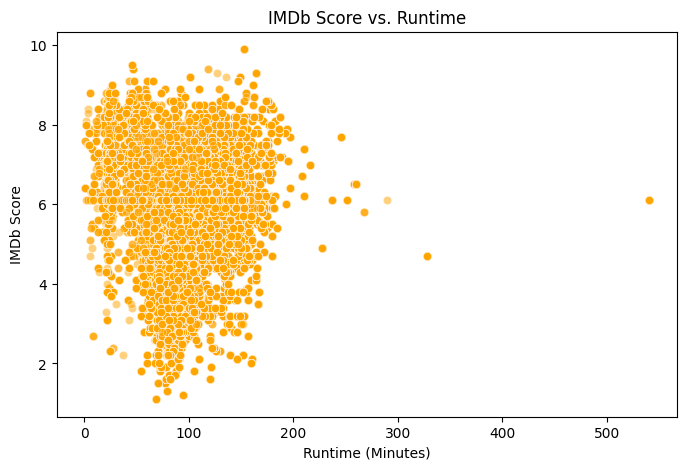

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=merge_df, x="runtime", y="imdb_score", alpha=0.5, color="orange")
plt.title("IMDb Score vs. Runtime")
plt.xlabel("Runtime (Minutes)")
plt.ylabel("IMDb Score")
plt.show()

1. Why did you choose this specific chart?
Answer:
The scatterplot was used to examine whether longer runtimes correlate with higher ratings for movies and shows.

2. What insights were derived from the chart?
Answer:
There is no obvious correlation; runtime does not appear to have a significant effect on content ratings.

3. Can these insights contribute to positive business outcomes? Are there any potential downsides? Please explain.
Answer:

Positive Impact: Platforms can confidently promote shorter content without concern that it will receive lower ratings.

Potential Negative Impact: If certain runtime lengths actually led to better ratings but were overlooked, this could result in suboptimal content curation decisions.

#### Chart-9

In [ ]:
# Chart-9 visualization code

<ipython-input-70-9137143a3b0b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors.values, y=top_actors.index, palette="husl")


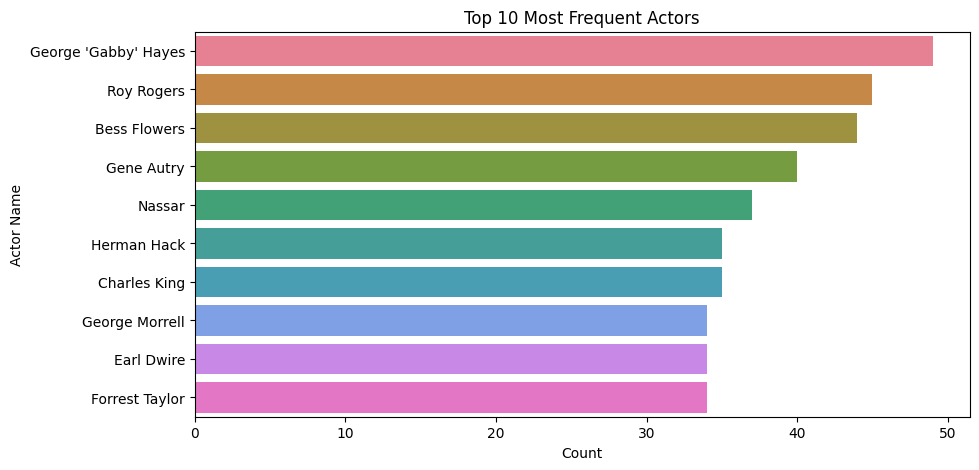

In [ ]:
top_actors = merge_df[merge_df["role"] == "ACTOR"]["name"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_actors.values, y=top_actors.index, palette="husl")
plt.title("Top 10 Most Frequent Actors")
plt.xlabel("Count")
plt.ylabel("Actor Name")
plt.show()

1. Why did you choose this specific chart?
Answer:
The bar plot was selected to highlight which actors have the highest frequency of appearances in the dataset.

2. What insights were gained from the chart?
Answer:
Certain actors appear much more frequently, indicating their popularity and strong presence in content production.

3. Can these insights foster positive business impact? Are there any possible drawbacks? Please explain.
Answer:

Positive Impact: Featuring well-known actors can boost marketing efforts and increase audience engagement.

Potential Negative Impact: Relying heavily on a limited group of actors might reduce diversity and limit appeal to broader audiences.

#### Chart-10

In [ ]:
# Chart-10 visualization code

<ipython-input-71-04066fca2545>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette="rocket_r")


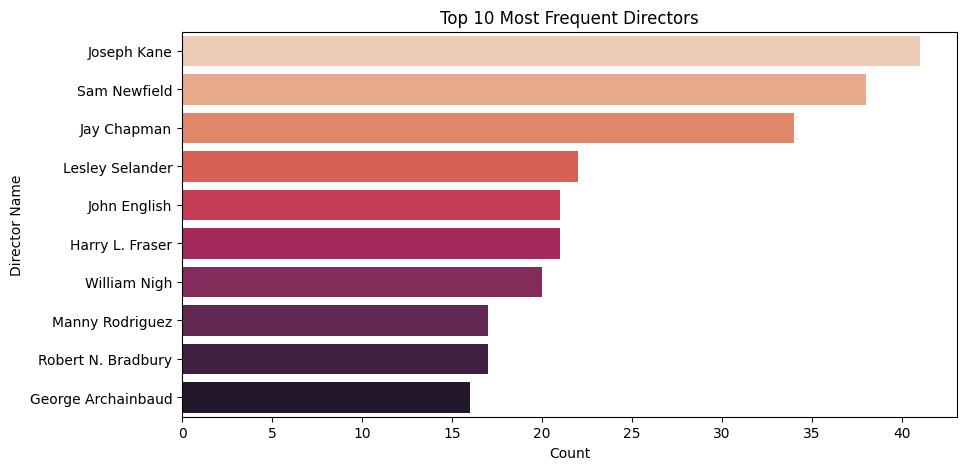

In [ ]:
top_directors = merge_df[merge_df["role"] == "DIRECTOR"]["name"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="rocket_r")
plt.title("Top 10 Most Frequent Directors")
plt.xlabel("Count")
plt.ylabel("Director Name")
plt.show()

1. Why did you choose this specific chart?
Answer:
The bar plot was used to identify the most influential directors within the dataset.

2. What insights were uncovered from the chart?
Answer:
Certain directors have a significant presence, indicating their strong contribution to the content pool.

3. Can these insights drive positive business results? Are there any potential risks? Please explain.
Answer:

Positive Impact: Content acquisition can be optimized by focusing on films from these prominent directors.

Potential Negative Impact: Excessive focus on well-known directors might cause platforms to miss out on promising new talent.

#### Chart-11

In [ ]:
# Chart-11 visualization code

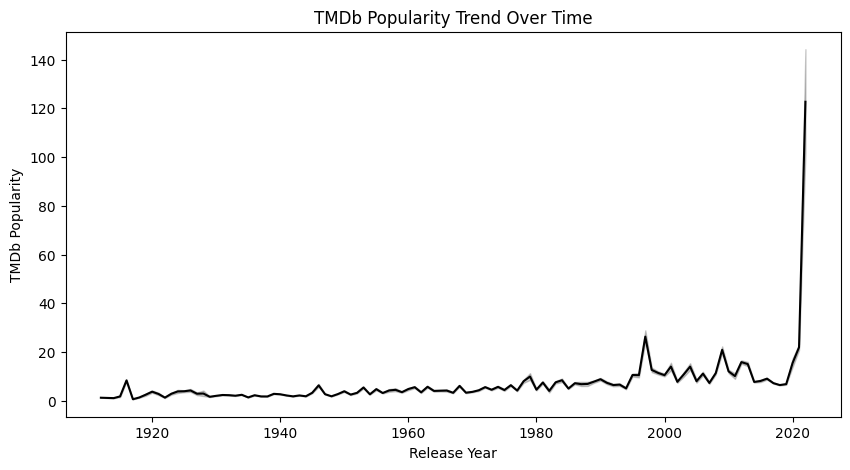

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=merge_df, x="release_year", y="tmdb_popularity", color="black")
plt.title("TMDb Popularity Trend Over Time")
plt.xlabel("Release Year")
plt.ylabel("TMDb Popularity")
plt.show()

1. Why did you choose this specific chart?
Answer:
The line plot was selected to analyze trends in content popularity over time.

2. What insights were derived from the chart?
Answer:
Popularity has generally increased over the years, with noticeable peaks in recent times.

3. Can these insights support positive business growth? Are there any potential drawbacks? Please explain.
Answer:

Positive Impact: Indicates that investing in newer content can drive higher audience engagement.

Potential Negative Impact: Older content may be overlooked despite maintaining a dedicated fan base, which could lead to missed opportunities.

#### Chart-12

In [ ]:
# Chart-12 visualization code

<ipython-input-73-97765ce33459>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merge_df, x="age_certification", order=merge_df["age_certification"].value_counts().index, palette="cubehelix")


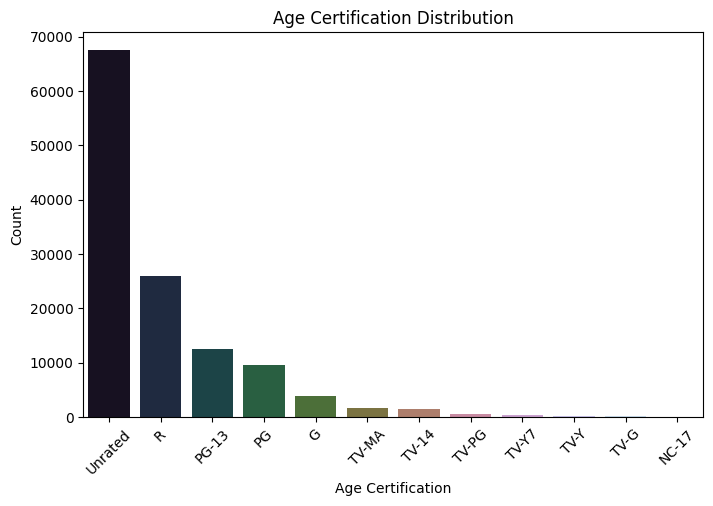

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=merge_df, x="age_certification", order=merge_df["age_certification"].value_counts().index, palette="cubehelix")
plt.title("Age Certification Distribution")
plt.xlabel("Age Certification")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

1. Why did you choose this specific chart?
Answer:
The count plot was selected to explore the distribution of content ratings within the dataset.

2. What insights were found from the chart?
Answer:
The majority of the content is rated PG-13 and R.

3. Can these insights foster positive business outcomes? Are there any potential risks? Please explain.
Answer:

Positive Impact: Platforms can tailor their offerings to appeal primarily to teen and adult audiences.

Potential Negative Impact: A shortage of children’s content might limit growth opportunities in the family-friendly segment.

#### Chart-13 Heatmap

In [ ]:
# Chart-13 Heatmap visualization code

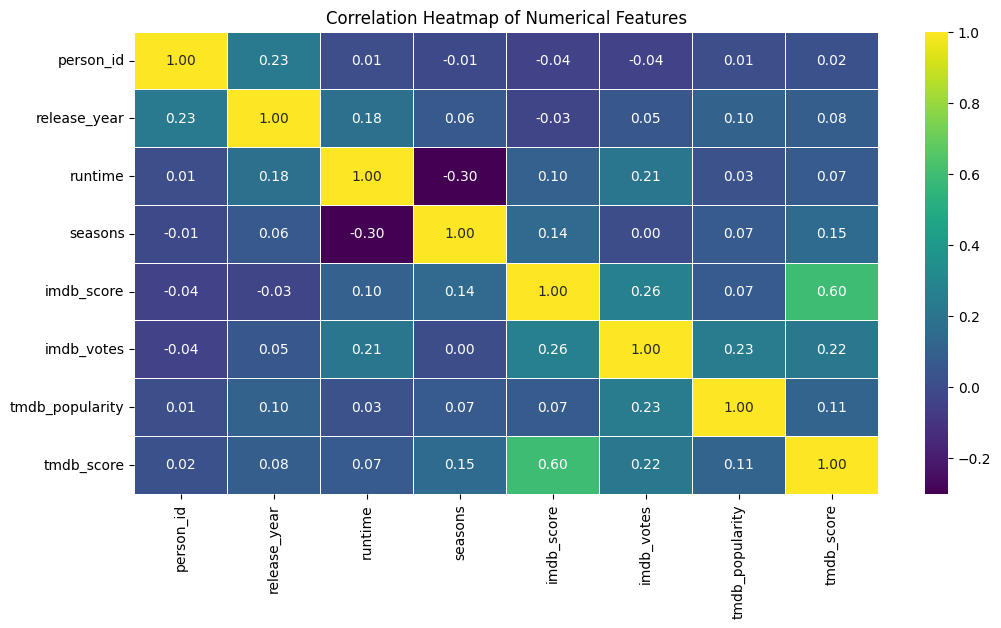

In [ ]:
# Generate correlation heatmap
plt.figure(figsize=(12,6))
corr_matrix = merge_df.corr(numeric_only=True)  # Ensuring only numeric columns are considered

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap="viridis", linewidths=0.5, fmt=".2f")

# Titles and labels
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

1. Why did you choose this specific chart?
Answer:
A correlation heatmap provides a clear visual overview of how numerical variables relate to each other. It helps in spotting:

Strong correlations that can guide feature selection for machine learning models.

Weak or negative correlations indicating variables that act independently.

Redundant variables that may not add new information.

2. What insights were gained from the chart?
Answer:
There is a strong positive correlation between IMDb scores and TMDb scores, suggesting that movies rated highly on IMDb tend to also receive high ratings on TMDb.

#### Chart-14 Pairplot

In [ ]:
# Chart-14 Pairplot visualization code

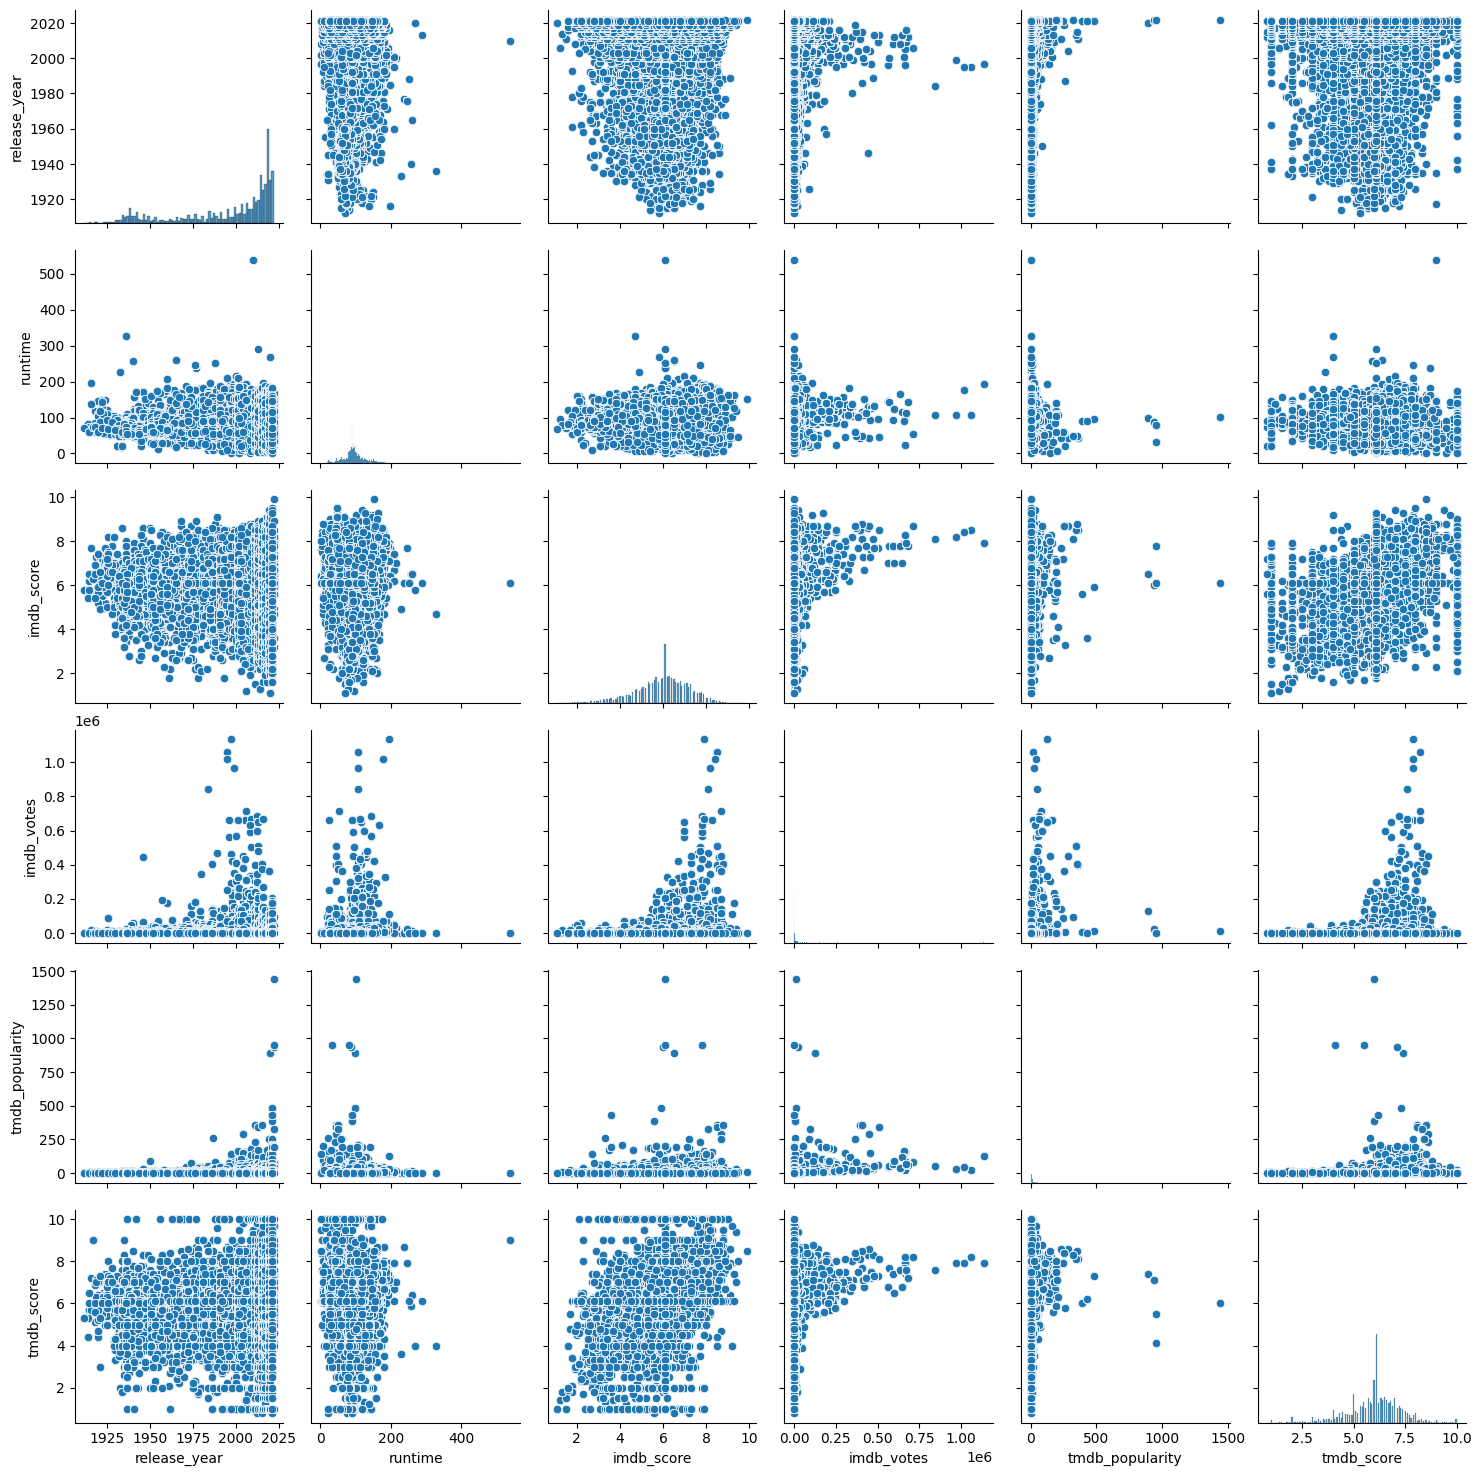

In [ ]:
# Selecting relevant numeric columns for the pair plot
numeric_columns = ["release_year", "runtime", "imdb_score", "imdb_votes", "tmdb_popularity", "tmdb_score"]

# Creating the pair plot
sns.pairplot(merge_df[numeric_columns])

# Show the plot
plt.show()

1. Why did you pick this specific chart?
Answer:
A pair plot is an effective visualization tool that displays relationships between multiple numerical variables by creating scatterplots for each pair and histograms along the diagonal. It helps to:

Identify correlations by revealing strong positive or negative associations.

Detect outliers that may require further scrutiny.

Understand the distribution of each numerical variable.

2. What insights were found from the chart?
Answer:

-IMDb Score & IMDb Votes: There is generally a positive correlation, where movies with more votes tend to have higher scores, reflecting audience engagement and positive reception. However, some films with high votes but low ratings may indicate polarizing content.

-IMDb Score vs. TMDb Score: A strong positive correlation is expected, since both are rating platforms. Any mismatches might highlight differences in audience demographics or preferences.

-TMDb Popularity vs. IMDb Votes: Higher TMDb popularity usually corresponds with more IMDb votes, although some films may go viral (high popularity) without necessarily having a large number of votes.

-Runtime vs. IMDb Score: Typically a weak correlation, but moderate runtimes (90-120 minutes) might be linked to better ratings, while very short or long films show more varied feedback.

-Release Year Trends: Newer movies often show higher TMDb popularity, suggesting recent content drives discussions, whereas older movies with high IMDb scores may be classic favorites that receive less current attention.

# HURRAY ,YOU HAVE SUCESSFULLY COMPLETED YOUR EDA PROJECT!